To collect data from YouTube, we need to be clear about what data we need. Let’s collect data about the trending videos on YouTube in US region to analyze and find what makes a video trend on YouTube.

So, let’s start with data collection first. To collect data from YouTube, you need to set up an API. Here are the steps you can follow:

1. Go to Google Cloud Console.
2. Click on the project drop-down at the top, then “New Project”.
3. Enter a project name and click “Create”.
4. In the Google Cloud Console, navigate to “APIs & Services” > “Library”.
5. Search for “YouTube Data API v3” and click on it.
6. Click “Enable”.
7. Go to “APIs & Services” > “Credentials”.
8. Click “+ CREATE CREDENTIALS” and select “API key”.
9. Copy the generated API key.

Let's Start....

In [19]:
#Import Libraries
import pandas as pd
from googleapiclient.discovery import build

In [21]:
API_KEY = 'Your_API_Key'

In [23]:
def get_trending_videos(api_key, max_results=200):
    #Build the youtube service
    youtube = build('youtube','v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # Fetch the most Popular Videos 
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption' : item['contentDetails'].get('caption', 'false'),
                'view_count' : item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count' : item['statistics'].get('dislikeCount', 0),
                'favorite_count' : item['statistics'].get('faoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


In the above code, we are using the YouTube Data API to fetch details of the top 200 trending videos in the US, iterating through the API’s paginated responses to collect video details such as title, description, published date, channel information, tags, duration, definition, captions, and various engagement metrics like views, likes, and comments. The script compiles this information into a list, converts it into a pandas DataFrame, and saves the data to a CSV file named trending_videos.csv, allowing us to analyze trends and patterns in the collected video data.

Now, let’s have a look at what the data looks like:

In [25]:
import pandas as pd

trending_videos = pd.read_csv('trending_videos.csv')

In [27]:
trending_videos

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,Ao9ix5XjD8Y,"Hurricane Milton Evacuation CHAOS Gas Lines, L...","Hurricane Helene's wrath is fresh, but a new s...",2024-10-08T03:01:26Z,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,25,"['hurricane milton', 'hurricane helene', 'tamp...",PT8M53S,hd,False,1616820,28729,0,0,5278
1,z0oMxKq451M,Historic Hurricane Milton Threatens Florida Wi...,Mandatory evacuations are underway across the ...,2024-10-08T08:25:37Z,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,[],PT10M48S,hd,True,801791,7690,0,0,1884
2,nE4a7XQUVpE,Bryan Norcross analyzes the latest on Hurrican...,FOX Weather Hurricane Specialist Bryan Norcros...,2024-10-07T23:28:09Z,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,"['fox weather', 'weather', 'fox weather app', ...",PT22M49S,hd,False,807323,8027,0,0,939
3,V4EuYnj0wLw,Hurricane Milton Is Going CAT 5...,Final video update for Major Hurricane Milton ...,2024-10-07T16:25:14Z,UCJHAT3Uvv-g3I8H3GhHWV7w,"Ryan Hall, Y'all",24,"['weather', 'weather forecasting', 'forecastin...",PT16M13S,hd,False,1469088,64946,0,0,4743
4,IPmxS07w-yk,"SURPRISED MY MOM WITH $10,000",NaN,2024-10-08T01:45:40Z,UCe17iPJ94iVHEUlcX6OGLsQ,Wendy Ortiz,22,[],PT11M54S,hd,False,157503,13574,0,0,534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,w5ebcowAJD8,How do QR codes work? (I built one myself to f...,How do QR codes work? The checkerboard pattern...,2024-09-30T18:51:21Z,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,28,"['QR codes', 'History of QR codes', 'history o...",PT35M13S,hd,True,5113421,197550,0,0,9557
196,k0c8Kka8bko,"The Judge Dismissed Valve's Defence, Now Steam...","Nothing like a legal drama. Today, we investig...",2024-10-01T20:28:46Z,UC3nPaf5MeeDTHA2JN7clidg,Bellular News,20,"['valve', 'steam', 'steam subscriber agreement...",PT12M10S,hd,False,789076,26471,0,0,4708
197,gAH_yw9yKZU,NAPOLI-COMO 3-1 | HIGHLIGHTS | McTominay score...,Napoli's red-hot form continued with a fourth ...,2024-10-04T19:50:05Z,UCBJeMCIeLQos7wacox4hmLQ,Serie A,17,"['Serie A', 'Dybala', 'highlights', 'Juventus'...",PT2M23S,hd,False,1361665,27118,0,0,1016
198,nDLmBv-2wb4,Minecraft Live 2024: The Monster in the Woods,We interrupt your YouTube feed with a special ...,2024-10-01T15:01:02Z,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,"['minecraft', 'minecraft live']",PT4M25S,hd,True,1534173,102125,0,0,4111


In [29]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,Ao9ix5XjD8Y,"Hurricane Milton Evacuation CHAOS Gas Lines, L...","Hurricane Helene's wrath is fresh, but a new s...",2024-10-08T03:01:26Z,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,25,"['hurricane milton', 'hurricane helene', 'tamp...",PT8M53S,hd,False,1616820,28729,0,0,5278
1,z0oMxKq451M,Historic Hurricane Milton Threatens Florida Wi...,Mandatory evacuations are underway across the ...,2024-10-08T08:25:37Z,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,[],PT10M48S,hd,True,801791,7690,0,0,1884
2,nE4a7XQUVpE,Bryan Norcross analyzes the latest on Hurrican...,FOX Weather Hurricane Specialist Bryan Norcros...,2024-10-07T23:28:09Z,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,"['fox weather', 'weather', 'fox weather app', ...",PT22M49S,hd,False,807323,8027,0,0,939
3,V4EuYnj0wLw,Hurricane Milton Is Going CAT 5...,Final video update for Major Hurricane Milton ...,2024-10-07T16:25:14Z,UCJHAT3Uvv-g3I8H3GhHWV7w,"Ryan Hall, Y'all",24,"['weather', 'weather forecasting', 'forecastin...",PT16M13S,hd,False,1469088,64946,0,0,4743
4,IPmxS07w-yk,"SURPRISED MY MOM WITH $10,000",NaN,2024-10-08T01:45:40Z,UCe17iPJ94iVHEUlcX6OGLsQ,Wendy Ortiz,22,[],PT11M54S,hd,False,157503,13574,0,0,534


In [31]:
trending_videos.shape

(200, 16)

In [33]:
trending_videos.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [35]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     197 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [37]:
trending_videos.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,200.000000,2.000000e+02,2.000000e+02,200.0,200.0,200.000000
mean,17.675000,2.071529e+06,8.469163e+04,0.0,0.0,6003.385000
std,7.628917,6.657501e+06,2.413205e+05,0.0,0.0,14157.487499
min,1.000000,3.654300e+04,0.000000e+00,0.0,0.0,0.000000
25%,10.000000,3.663800e+05,1.287600e+04,0.0,0.0,1070.250000
50%,20.000000,9.098990e+05,3.162550e+04,0.0,0.0,2555.000000
75%,24.000000,1.625548e+06,7.847550e+04,0.0,0.0,5503.750000
max,28.000000,8.333074e+07,2.613948e+06,0.0,0.0,126055.000000


Now, let’s have a quick look at the missing values and data types:

In [39]:
# mCheck for missing values
missing_values = trending_videos.isnull().sum()

In [41]:
# Display data types
data_types = trending_videos.dtypes

In [43]:
missing_values, data_types

(video_id          0
 title             0
 description       3
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

The description column has 3 missing values. This is minor and can be handled as needed. The data types seem appropriate for most columns, but we may need to convert the published_at column to a datetime format and tags might need further processing. Let’s fix these changes:

In [45]:
trending_videos['description'].fillna('No description', inplace=True)

/tmp/ipykernel_4678/2319240741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [47]:

#trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

In [49]:
#Convert published_at to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'], errors='coerce')

In [51]:
trending_videos.dtypes

video_id                       object
title                          object
description                    object
published_at      datetime64[ns, UTC]
channel_id                     object
channel_title                  object
category_id                     int64
tags                           object
duration                       object
definition                     object
caption                          bool
view_count                      int64
like_count                      int64
dislike_count                   int64
favorite_count                  int64
comment_count                   int64
dtype: object

In [53]:
# Convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

Now, before moving forward with the analysis, let’s have a quick look at the descriptive statistics:

In [55]:
# Descriptive Stats
descriptive_stats = trending_videos[['view_count', 'like_count','dislike_count', 'comment_count']].describe()

In [57]:
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.000000
mean,2.071529e+06,8.469163e+04,0.0,6003.385000
std,6.657501e+06,2.413205e+05,0.0,14157.487499
min,3.654300e+04,0.000000e+00,0.0,0.000000
25%,3.663800e+05,1.287600e+04,0.0,1070.250000
50%,9.098990e+05,3.162550e+04,0.0,2555.000000
75%,1.625548e+06,7.847550e+04,0.0,5503.750000
max,8.333074e+07,2.613948e+06,0.0,126055.000000


Now, let’s have a look at the distribution of views, likes and comments of all the videos in the data:

In [59]:
#  distribution of views, likes and comments of all the videos in the data:

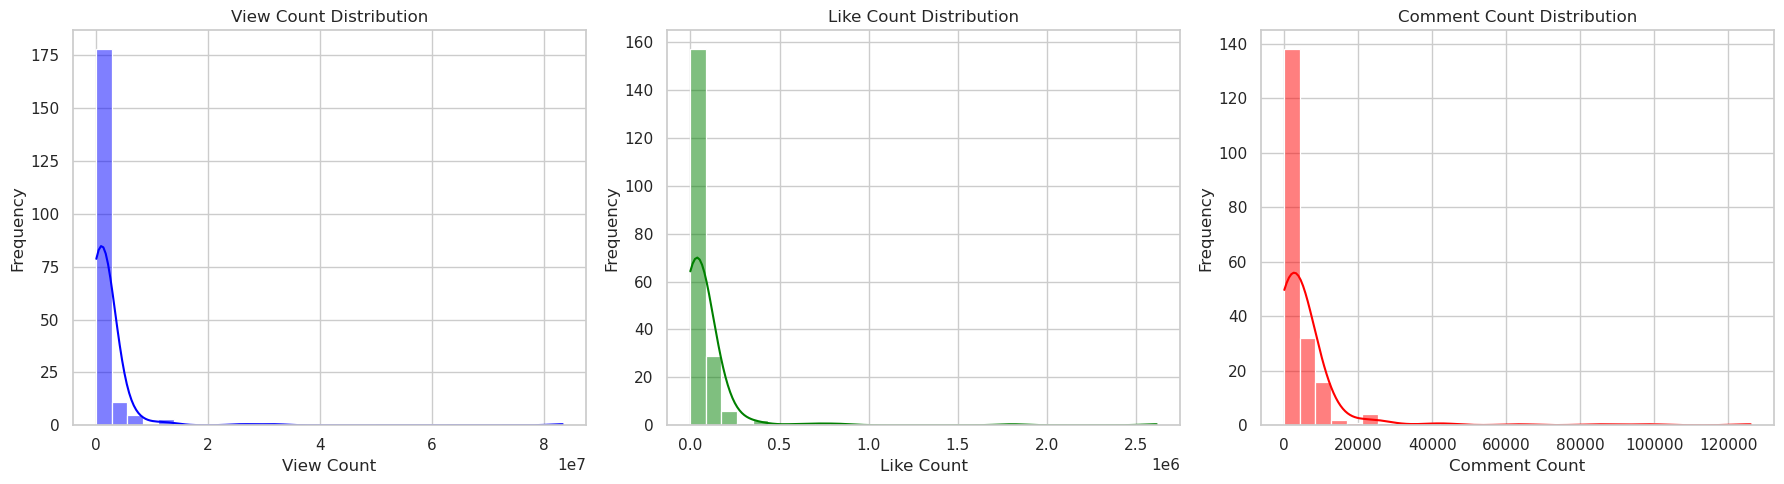

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,3, figsize=(18, 5))

#View Count distribution

sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# Like count Distribution

sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

#Comment Count Distribution

sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color = 'Red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms show that the distributions of view counts, like counts, and comment counts are right-skewed, with most videos having lower counts and a few videos having very high counts. Now, let’s have a look at the correlation between likes, views, and comments:

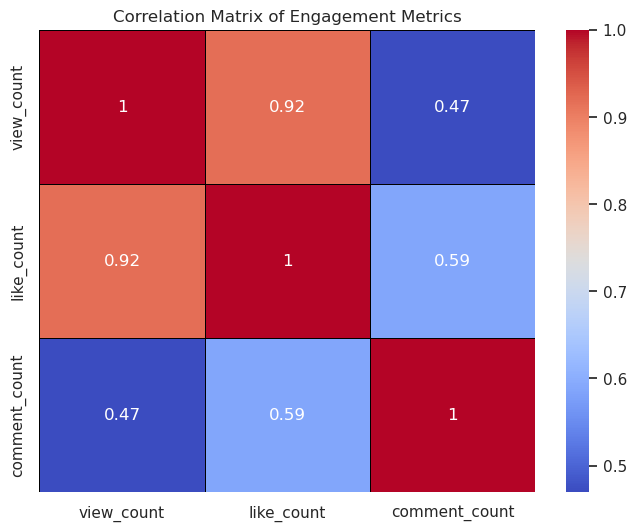

In [63]:
# Correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

The heatmap confirms strong positive correlations between views, likes, and comments.

I noticed that I only collected the category ID of the video and not the category name. So, let’s collect the category names as well to analyze the categories of the trending videos:

In [68]:
from googleapiclient.discovery import build

API_KEY = 'Your_API_Key'
youtube = build('youtube','v3', developerKey= API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

#Get the category mapping
category_mapping = get_category_mapping()
category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Now, here’s how we can analyze the number of trending videos by category:

/tmp/ipykernel_4678/2976753215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


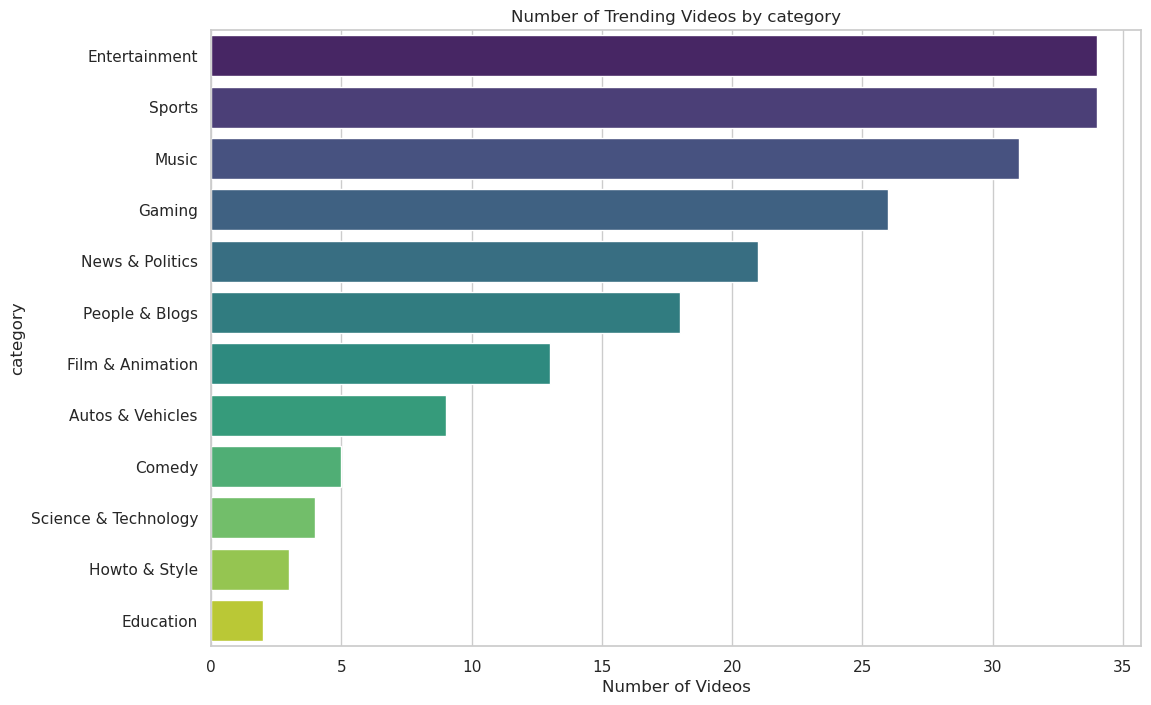

In [70]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12,8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by category')
plt.xlabel('Number of Videos')
plt.ylabel('category')
plt.show()

The bar chart shows that the Entertainment, Sports, and Music categories have the highest number of trending videos. Now, let’s have a look at the average engagement metrics by category:

In [72]:
trending_videos

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name
0,Ao9ix5XjD8Y,"Hurricane Milton Evacuation CHAOS Gas Lines, L...","Hurricane Helene's wrath is fresh, but a new s...",2024-10-08 03:01:26+00:00,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,25,"[hurricane milton, hurricane helene, tampa bay...",PT8M53S,hd,False,1616820,28729,0,0,5278,News & Politics
1,z0oMxKq451M,Historic Hurricane Milton Threatens Florida Wi...,Mandatory evacuations are underway across the ...,2024-10-08 08:25:37+00:00,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,[],PT10M48S,hd,True,801791,7690,0,0,1884,News & Politics
2,nE4a7XQUVpE,Bryan Norcross analyzes the latest on Hurrican...,FOX Weather Hurricane Specialist Bryan Norcros...,2024-10-07 23:28:09+00:00,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,"[fox weather, weather, fox weather app, weathe...",PT22M49S,hd,False,807323,8027,0,0,939,News & Politics
3,V4EuYnj0wLw,Hurricane Milton Is Going CAT 5...,Final video update for Major Hurricane Milton ...,2024-10-07 16:25:14+00:00,UCJHAT3Uvv-g3I8H3GhHWV7w,"Ryan Hall, Y'all",24,"[weather, weather forecasting, forecasting, fo...",PT16M13S,hd,False,1469088,64946,0,0,4743,Entertainment
4,IPmxS07w-yk,"SURPRISED MY MOM WITH $10,000",No description,2024-10-08 01:45:40+00:00,UCe17iPJ94iVHEUlcX6OGLsQ,Wendy Ortiz,22,[],PT11M54S,hd,False,157503,13574,0,0,534,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,w5ebcowAJD8,How do QR codes work? (I built one myself to f...,How do QR codes work? The checkerboard pattern...,2024-09-30 18:51:21+00:00,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,28,"[QR codes, History of QR codes, history of com...",PT35M13S,hd,True,5113421,197550,0,0,9557,Science & Technology
196,k0c8Kka8bko,"The Judge Dismissed Valve's Defence, Now Steam...","Nothing like a legal drama. Today, we investig...",2024-10-01 20:28:46+00:00,UC3nPaf5MeeDTHA2JN7clidg,Bellular News,20,"[valve, steam, steam subscriber agreement, ste...",PT12M10S,hd,False,789076,26471,0,0,4708,Gaming
197,gAH_yw9yKZU,NAPOLI-COMO 3-1 | HIGHLIGHTS | McTominay score...,Napoli's red-hot form continued with a fourth ...,2024-10-04 19:50:05+00:00,UCBJeMCIeLQos7wacox4hmLQ,Serie A,17,"[Serie A, Dybala, highlights, Juventus, AC Mil...",PT2M23S,hd,False,1361665,27118,0,0,1016,Sports
198,nDLmBv-2wb4,Minecraft Live 2024: The Monster in the Woods,We interrupt your YouTube feed with a special ...,2024-10-01 15:01:02+00:00,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,"[minecraft, minecraft live]",PT4M25S,hd,True,1534173,102125,0,0,4111,Gaming


In [74]:
# Average engagement metrics by category

/tmp/ipykernel_4678/1417499161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette = 'viridis')
/tmp/ipykernel_4678/1417499161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette = 'viridis')
/tmp/ipykernel_4678/1417499161.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette = 'viridi

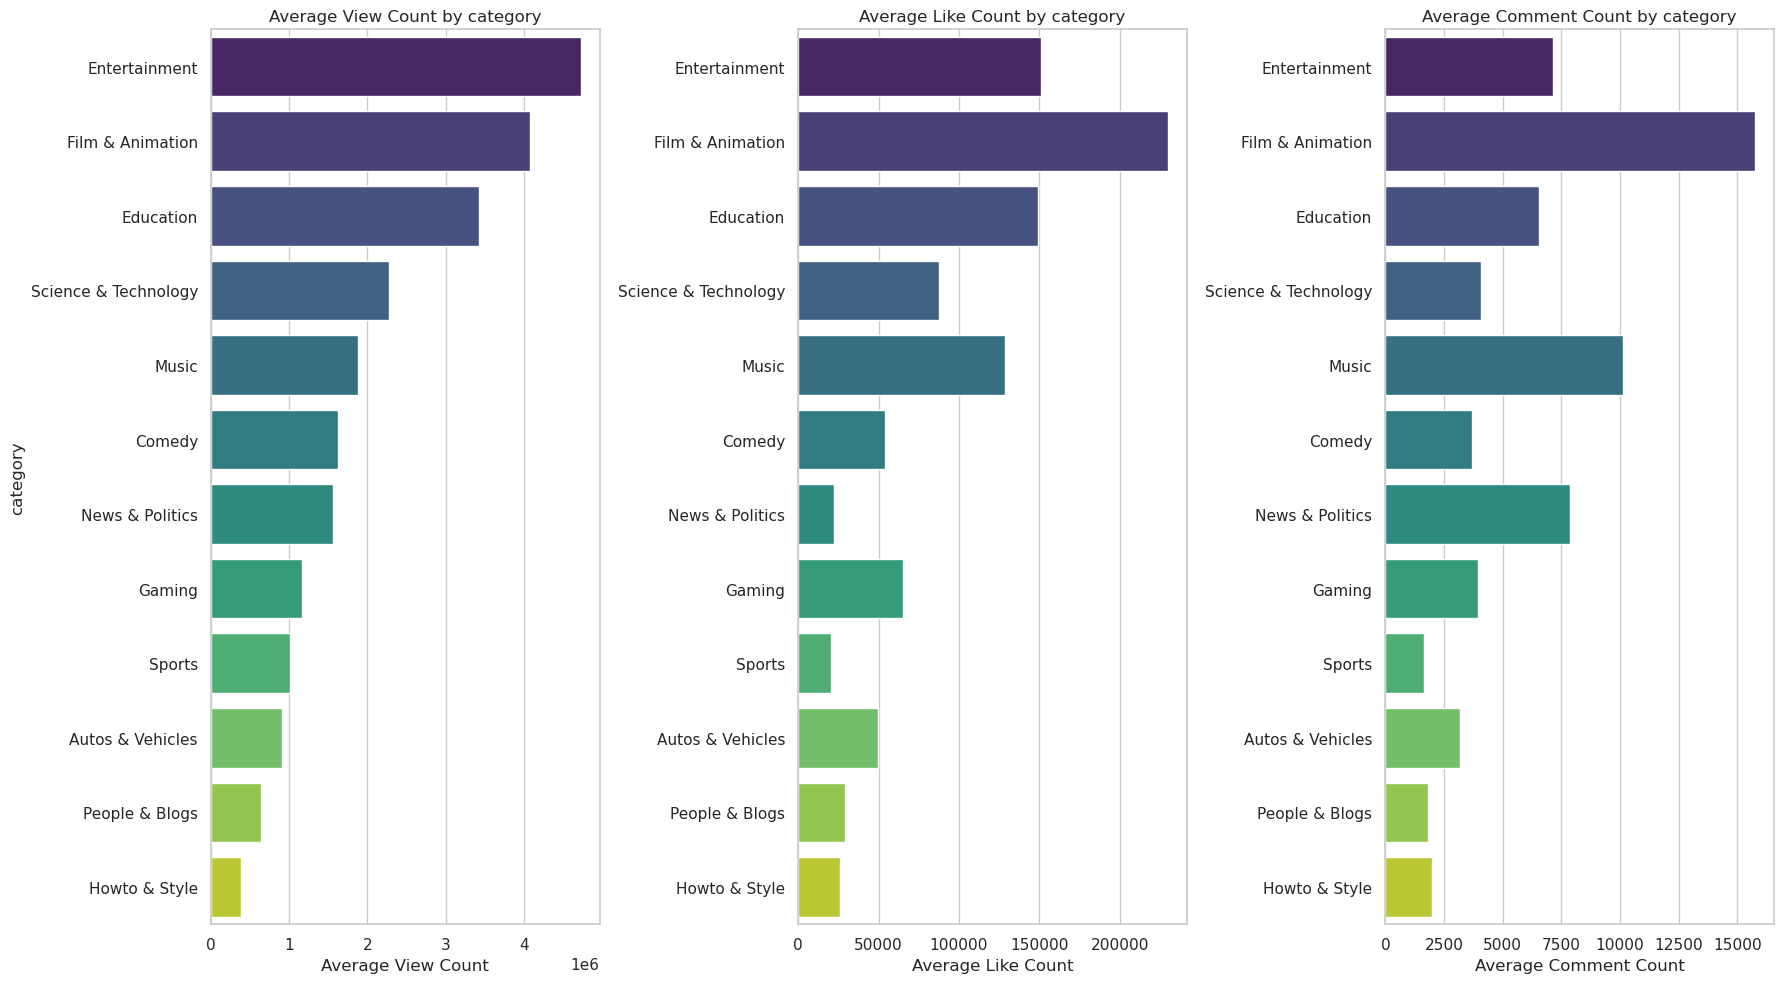

In [76]:
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18,10))

#View count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette = 'viridis')
axes[0].set_title('Average View Count by category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('category')

#Like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette = 'viridis')
axes[1].set_title('Average Like Count by category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

#Comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette = 'viridis')
axes[2].set_title('Average Comment Count by category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Entertainment, Film & Animation and Education categories have the highest average view counts, likes, and comments. Film & Animation also shows high engagement, especially in like counts and comment counts.

Now, let’s analyze the content and duration of the videos. But first, we need to convert the duration from ISO 8601 format to seconds:

In [78]:
!pip install isodate
import isodate

#Convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

In the above code, we are using the isodate library to convert the duration of each video from the ISO 8601 format to seconds, which allows for numerical analysis. After converting the durations, we are categorizing the videos into different duration ranges (0-5 minutes, 5-10 minutes, 10-20 minutes, 20-60 minutes, and 60-120 minutes) by creating a new column called duration_range. This categorization enables us to analyze and compare the engagement metrics of videos within specific length intervals, providing insights into how video length influences viewer behaviour and video performance.

In [80]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,duration_seconds,duration_range
0,Ao9ix5XjD8Y,"Hurricane Milton Evacuation CHAOS Gas Lines, L...","Hurricane Helene's wrath is fresh, but a new s...",2024-10-08 03:01:26+00:00,UCXoMM35ugF5iOzAEb-PmfRA,Jonathan Petramala,25,"[hurricane milton, hurricane helene, tampa bay...",PT8M53S,hd,False,1616820,28729,0,0,5278,News & Politics,533.0,5-10 min
1,z0oMxKq451M,Historic Hurricane Milton Threatens Florida Wi...,Mandatory evacuations are underway across the ...,2024-10-08 08:25:37+00:00,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,[],PT10M48S,hd,True,801791,7690,0,0,1884,News & Politics,648.0,10-20 min
2,nE4a7XQUVpE,Bryan Norcross analyzes the latest on Hurrican...,FOX Weather Hurricane Specialist Bryan Norcros...,2024-10-07 23:28:09+00:00,UC1FbPiXx59_ltnFVx7IxWow,FOX Weather,25,"[fox weather, weather, fox weather app, weathe...",PT22M49S,hd,False,807323,8027,0,0,939,News & Politics,1369.0,20-60 min
3,V4EuYnj0wLw,Hurricane Milton Is Going CAT 5...,Final video update for Major Hurricane Milton ...,2024-10-07 16:25:14+00:00,UCJHAT3Uvv-g3I8H3GhHWV7w,"Ryan Hall, Y'all",24,"[weather, weather forecasting, forecasting, fo...",PT16M13S,hd,False,1469088,64946,0,0,4743,Entertainment,973.0,10-20 min
4,IPmxS07w-yk,"SURPRISED MY MOM WITH $10,000",No description,2024-10-08 01:45:40+00:00,UCe17iPJ94iVHEUlcX6OGLsQ,Wendy Ortiz,22,[],PT11M54S,hd,False,157503,13574,0,0,534,People & Blogs,714.0,10-20 min


Now, let’s analyze the content and the duration of videos:

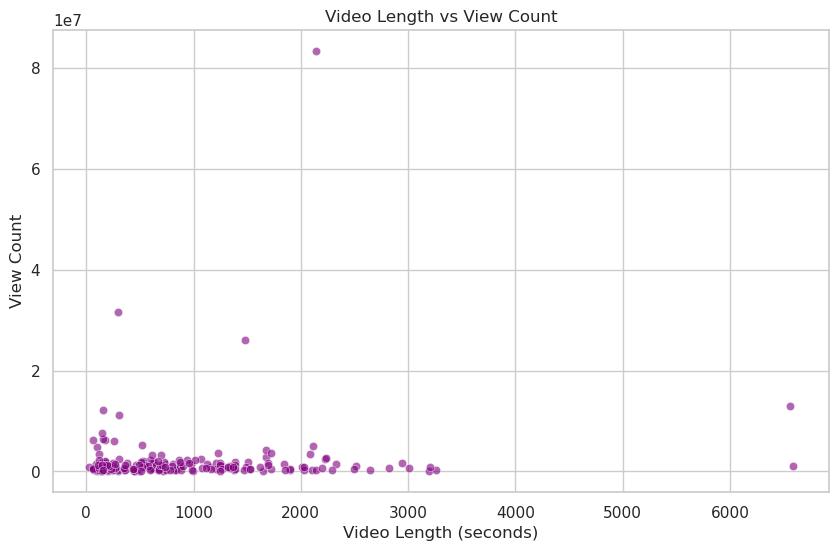

/tmp/ipykernel_4678/1230314429.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
/tmp/ipykernel_4678/1230314429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
/tmp/ipykernel_4678/1230314429.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement[

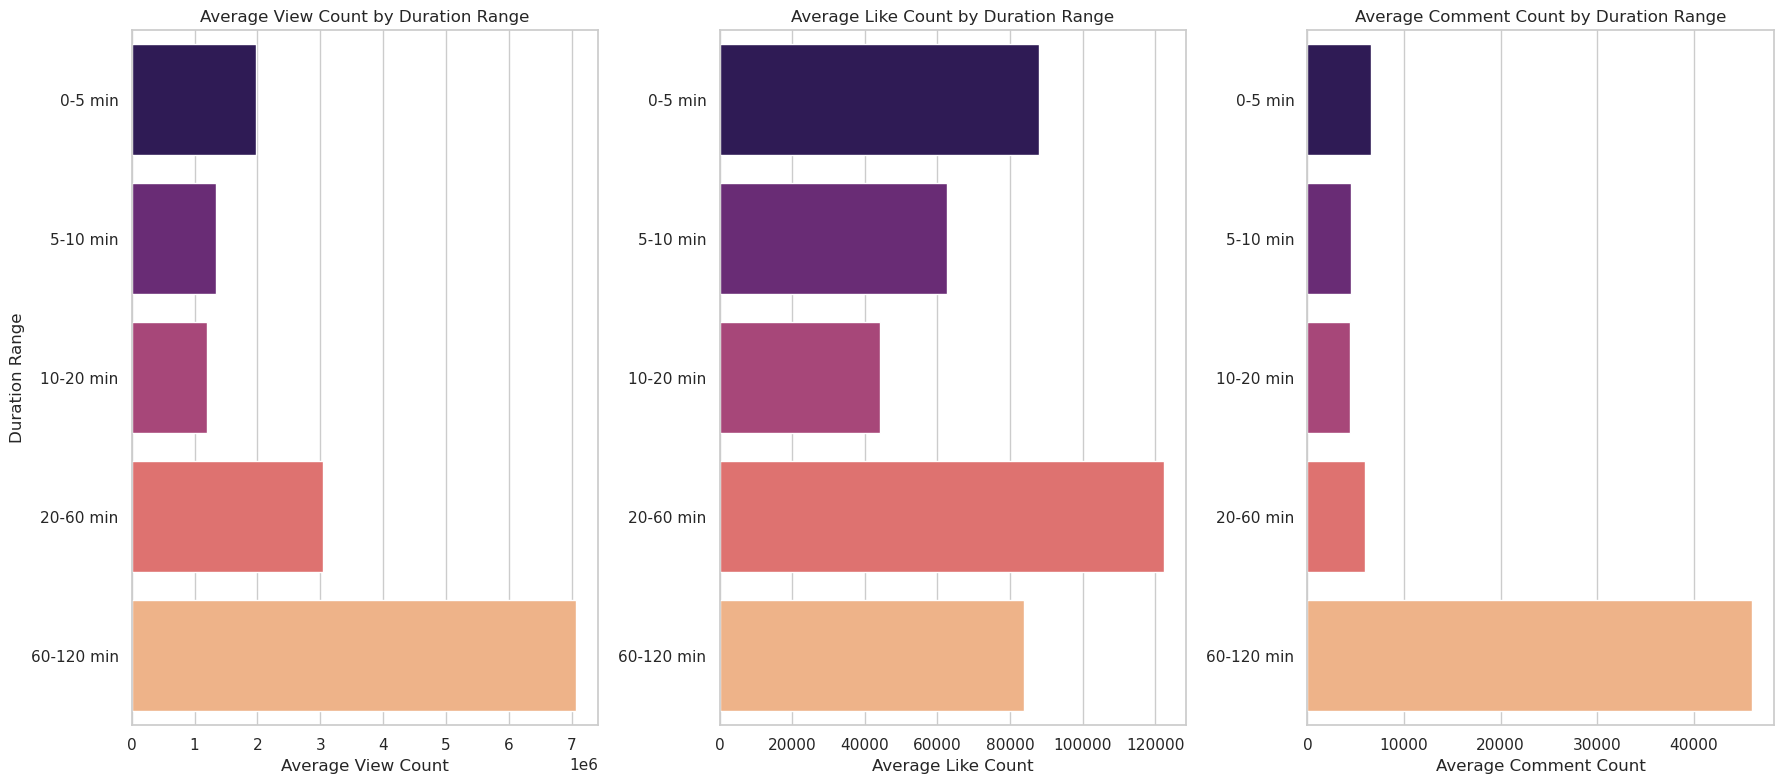

In [82]:
# Scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()


# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In the scatter plot, shorter videos (less than 1000 seconds) dominate in number but display a wide range of view counts, indicating varying levels of popularity among shorter content. However, there are outliers where longer videos (up to 6000 seconds) have achieved high view counts. 

The bar plots further emphasize that longer videos, particularly those in the 60-120 minute range, have higher average view, like, and comment counts compared to shorter videos. This suggests that while shorter videos are more common, longer videos may drive higher overall engagement when they capture viewers' attention. This may imply that for longer content, audiences are more willing to interact, resulting in more significant engagement metrics despite their lesser frequency.


Now, let’s analyze the relationship between views and number of tags used in the video:

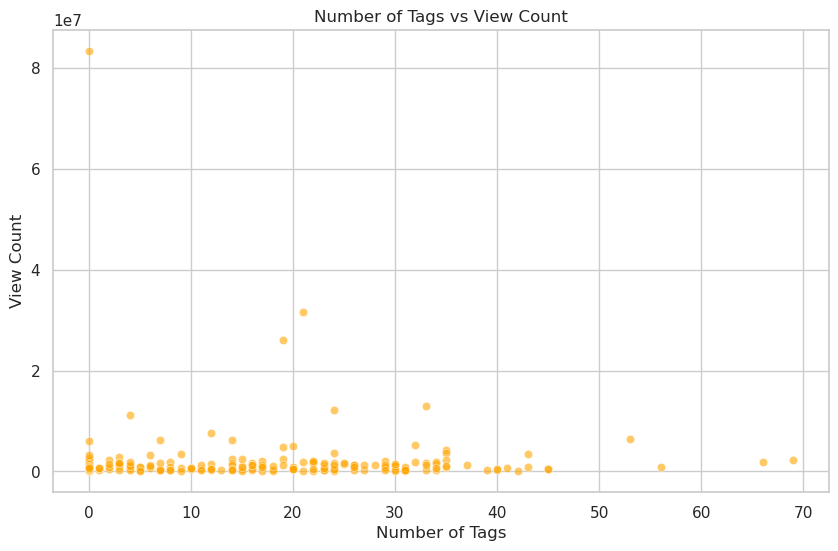

In [84]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

The scatter plot illustrates the relationship between the number of tags and view count. Most videos have a tag count ranging from 0 to 20, with a wide range of view counts, including some with very high views (in the millions). However, as the number of tags increases beyond 20, the view count seems to generally decrease, with very few instances of high view counts. This suggests that while adding more tags doesn't necessarily guarantee higher view counts, a moderate number of tags might be associated with better visibility or engagement.

Now, let’s see if there’s an impact of the time a video is posted on its views:

/tmp/ipykernel_4678/1314667626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


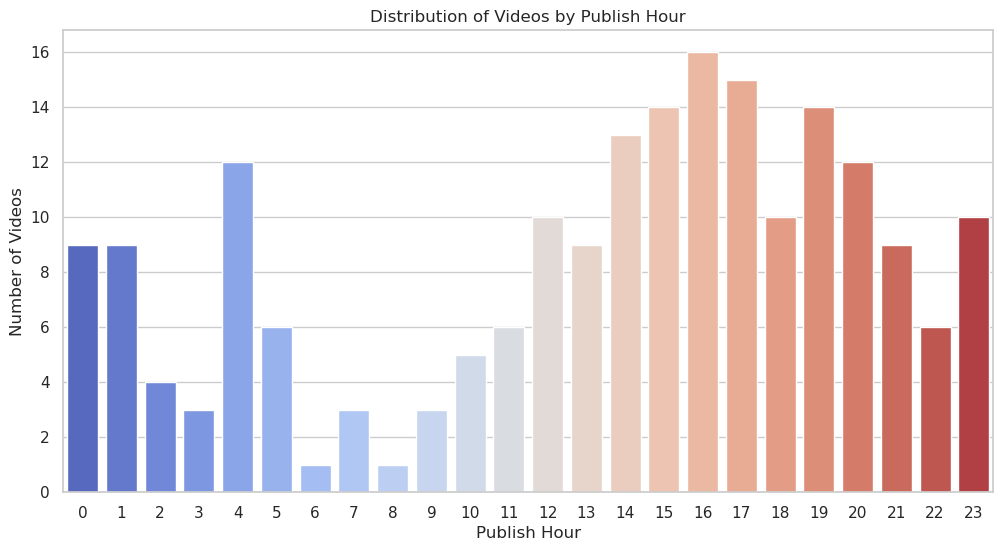

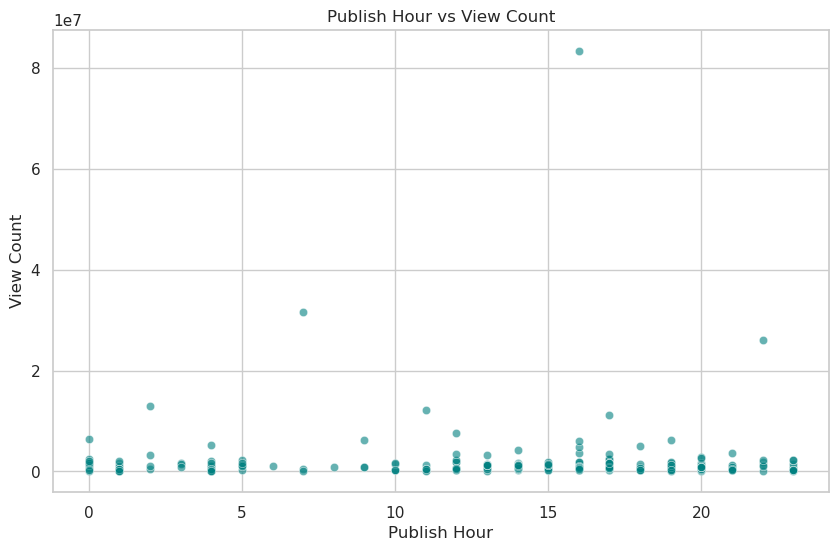

In [109]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

The distribution shows that most videos are published between 14:00 and 20:00 hours (2 PM – 8 PM), indicating this may be an optimal time for uploading videos. There is a very weak negative relationship between publish hour and view count, suggesting that the hour of publication has minimal impact on engagement metrics.